In [58]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')



In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


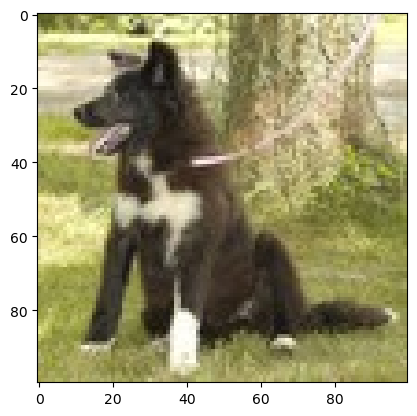

In [5]:
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [20]:
def build_model():
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    
    # Freeze the pre-trained weights
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_model()

In [21]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Lower learning rate for transfer learning
    loss='binary_crossentropy',
    metrics=['accuracy', AUC()]
)

In [8]:
X_train = preprocess_input(X_train * 255.)  # ResNet50 expects values in different range
X_test = preprocess_input(X_test * 255.)

In [9]:
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6, monitor='val_loss'),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')
]

In [10]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [11]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=callbacks
)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - accuracy: 0.6101 - auc: 0.6555 - loss: 0.7671 - val_accuracy: 0.8800 - val_auc: 0.9656 - val_loss: 0.2557 - learning_rate: 1.0000e-04
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.7640 - auc: 0.8390 - loss: 0.5419 - val_accuracy: 0.9125 - val_auc: 0.9765 - val_loss: 0.2049 - learning_rate: 1.0000e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.7888 - auc: 0.8613 - loss: 0.5106 - val_accuracy: 0.9100 - val_auc: 0.9796 - val_loss: 0.1964 - learning_rate: 1.0000e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.8075 - auc: 0.8874 - loss: 0.4477 - val_accuracy: 0.9175 - val_auc: 0.9814 - val_loss: 0.1878 - learning_rate: 1.0000e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.7994 - auc: 0.8937 - loss: 0.4300 - val_accuracy: 0.9100 - val_auc: 0.9811 - val_loss: 0.1841 - learning_rate: 1.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0

In [12]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.9544 - auc: 0.5632 - loss: 0.1303


[0.17620189487934113, 0.9300000071525574, 0.985537588596344]

In [31]:
# Store original data before any preprocessing
# Add this right after loading the data but before any preprocessing
X_test_original = np.loadtxt('input_test.csv', delimiter=',')
X_test_original = X_test_original.reshape(len(X_test_original), 100, 100, 3)
X_test_original = X_test_original/255  # Just normalize to [0,1] for display

# Then in your visualization code

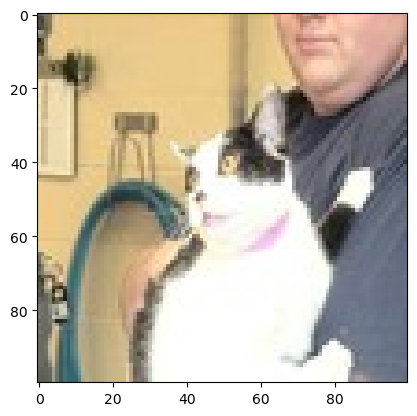

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Cat


In [57]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test_original[idx2])  # This will show the actual original image
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    print('Dog')
else:
    print('Cat')